In [1]:
from QFpy.vanilla_option_utils import *
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter


In [2]:
T = 10 
t = 0
E = 100 
s = np.linspace(0,200,100)

/Users/carlomusolino/QFPyv2/.tox/py39/lib/python3.9/site-packages/QFpy/vanilla_option_utils.py:7: RuntimeWarning: divide by zero encountered in log
  return (np.log(S/E)+(r-D+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
/Users/carlomusolino/QFPyv2/.tox/py39/lib/python3.9/site-packages/QFpy/vanilla_option_utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return (np.log(S/E)+(r-D+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
/Users/carlomusolino/QFPyv2/.tox/py39/lib/python3.9/site-packages/QFpy/vanilla_option_utils.py:42: RuntimeWarning: invalid value encountered in divide
  return np.exp(-D*(T-t)) * __dCDF(__d1(t,S,E,r,D,sigma,T)) / ( sigma * S * np.sqrt(T-t) )
/Users/carlomusolino/QFPyv2/.tox/py39/lib/python3.9/site-packages/QFpy/vanilla_option_utils.py:53: RuntimeWarning: invalid value encountered in divide
  return -sigma*S*np.exp(-D*(T-t))*__dCDF(d1v)/(2*np.sqrt(T-t)) + D*S*__CDF(d1v)*np.exp(-D*(T-t)) - r*E*np.exp(-r*(T-t)) * __CDF(d2v)


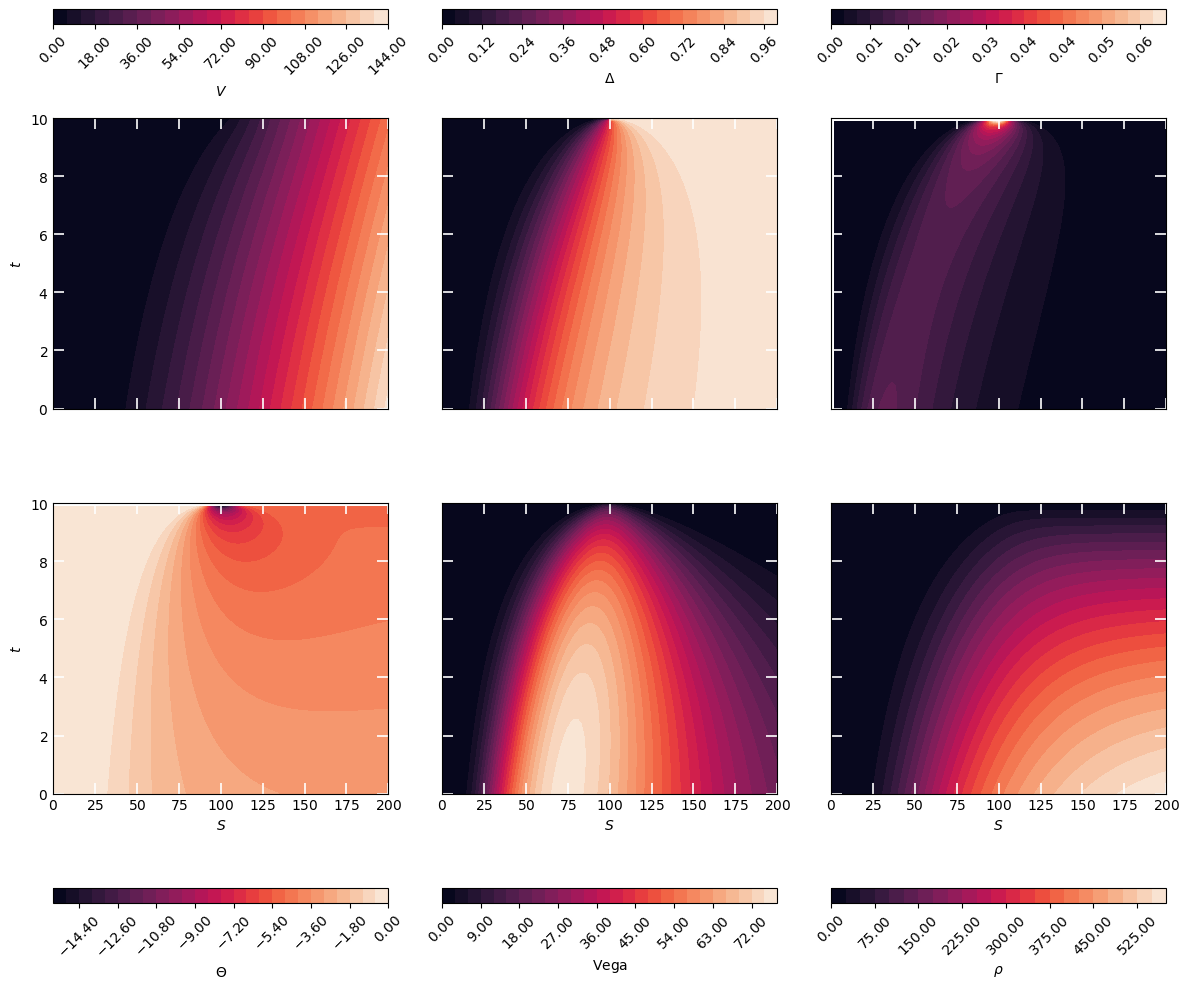

In [3]:
# See dependence on time 
r = 0.05 
D = 0 
sigma = 0.2 

N = 100

t = np.linspace(0,T,N)

# Choose a palette, e.g., 'deep'
palette_name = "rocket"

# Get N colors from the palette
colors = sns.color_palette(palette_name,  as_cmap=True)

ss,tt = np.meshgrid(s,t)

val = np.zeros(ss.shape)
Delta = np.zeros(ss.shape)
Gamma = np.zeros(ss.shape)
Theta = np.zeros(ss.shape)
Vega = np.zeros(ss.shape)
Rho = np.zeros(ss.shape)


fig = plt.figure(figsize=[12,10])
gs = gridspec.GridSpec(4, 3, figure=fig, height_ratios=[0.05,1,1,0.05])



val = EuropeanCallValue(tt,ss,T,E,sigma,r,D)
Delta = EuropeanCallDelta(tt,ss,T,E,sigma,r,D)
Gamma = EuropeanCallGamma(tt,ss,T,E,sigma,r,D)
Theta = EuropeanCallTheta(tt,ss,T,E,sigma,r,D)
Vega = EuropeanCallVega(tt,ss,T,E,sigma,r,D)
Rho = EuropeanCallRho(tt,ss,T,E,sigma,r,D)

plotvars  = [val,Delta,Gamma,Theta,Vega,Rho]
varlabels = [r"$V$", r"$\Delta$", r"$\Gamma$", r"$\Theta$", r"$\text{Vega}$", r"$\rho$"]


cbar_idxs = [0,1,2,-3,-2,-1]
axes_idxs = [3,4,5,6,7,8]

axes = []
# Loop over the number of plots you want (6 in this case)
for i in range(6):
    ax = fig.add_subplot(gs[axes_idxs[i]])  # Plot axis
    axes.append(ax)
    
    cax = fig.add_subplot(gs[cbar_idxs[i]])  # Colorbar axis
    
    # Plotting the data (replace this with your actual plotting function)
    im = ax.contourf(ss,tt,plotvars[i], cmap=colors, levels=25)
    
    # Adding the colorbar
    cbar = fig.colorbar(im, cax=cax, label=varlabels[i], orientation="horizontal")
    cbar.ax.tick_params(labelrotation=45)
    
    ax.tick_params(which="both", direction="in", width=1.2, length=8, color="white", right=True, top=True)
    
    cbar.ax.xaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.2f'+r"$"))

# Set all axes to share the same x and y axis limits
for ax in axes:
    ax.sharex(axes[0])
    ax.sharey(axes[0])
     # Setting tick formatter for axes
    ax.xaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.0f'+r"$"))
    ax.yaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.0f'+r"$"))

    
for i in range(3):
    axes[i].tick_params(labelbottom=False)
for i in [1,2,4,5]:
    axes[i].tick_params(labelleft=False)
for i in [0,3]:
    axes[i].set_ylabel(r"$t$")
for i in [3,4,5]:
    axes[i].set_xlabel(r"$S$")
# Adjust spacing between plots
#plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()

plt.show()

In [4]:
# See dependence on volatility 
r = 0.05 
D = 0 

N = 100

sigma = np.linspace(0,0.4,N)

# Choose a palette, e.g., 'deep'
palette_name = "rocket"

# Get N colors from the palette
colors = sns.color_palette(palette_name,  as_cmap=True)

S,SIGMA = np.meshgrid(s,sigma)

val = np.zeros(S.shape)



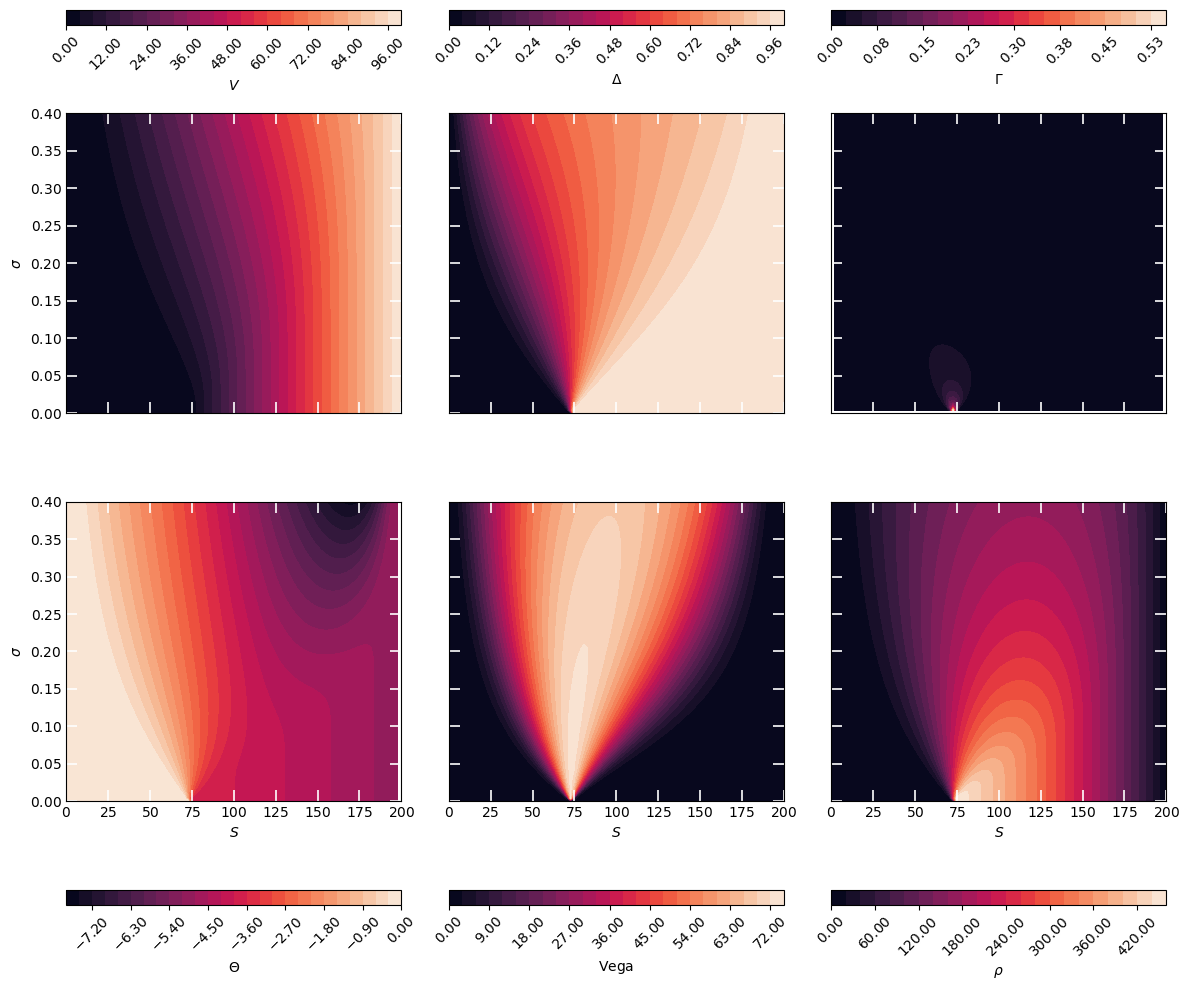

In [5]:
fig = plt.figure(figsize=[12,10])
gs = gridspec.GridSpec(4, 3, figure=fig, height_ratios=[0.05,1,1,0.05])

val = np.zeros(S.shape)
Delta = np.zeros(S.shape)
Gamma = np.zeros(S.shape)
Theta = np.zeros(S.shape)
Vega = np.zeros(S.shape)
Rho = np.zeros(S.shape)

plotvars  = [val,Delta,Gamma,Theta,Vega,Rho]
varlabels = [r"$V$", r"$\Delta$", r"$\Gamma$", r"$\Theta$", r"$\text{Vega}$", r"$\rho$"]

for i,ss in enumerate(sigma):
    val[i,:] = EuropeanCallValue(t,s,T,E,ss,r,D)
    Delta[i,:] = EuropeanCallDelta(t,s,T,E,ss,r,D)
    Gamma[i,:] = EuropeanCallGamma(t,s,T,E,ss,r,D)
    Theta[i,:] = EuropeanCallTheta(t,s,T,E,ss,r,D)
    Vega[i,:] = EuropeanCallVega(t,s,T,E,ss,r,D)
    Rho[i,:] = EuropeanCallRho(t,s,T,E,ss,r,D)

cbar_idxs = [0,1,2,-3,-2,-1]
axes_idxs = [3,4,5,6,7,8]

axes = []
# Loop over the number of plots you want (6 in this case)
for i in range(6):
    ax = fig.add_subplot(gs[axes_idxs[i]])  # Plot axis
    axes.append(ax)
    
    cax = fig.add_subplot(gs[cbar_idxs[i]])  # Colorbar axis
    
    # Plotting the data (replace this with your actual plotting function)
    im = ax.contourf(S,SIGMA,plotvars[i], cmap=colors, levels=25)
    
    # Adding the colorbar
    cbar = fig.colorbar(im, cax=cax, label=varlabels[i], orientation="horizontal")
    cbar.ax.tick_params(labelrotation=45)
    
    ax.tick_params(which="both", direction="in", width=1.2, length=8, color="white", right=True, top=True)
    
    cbar.ax.xaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.2f'+r"$"))

# Set all axes to share the same x and y axis limits
for ax in axes:
    ax.sharex(axes[0])
    ax.sharey(axes[0])
     # Setting tick formatter for axes
    ax.xaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.0f'+r"$"))
    ax.yaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.2f'+r"$"))

    
for i in range(3):
    axes[i].tick_params(labelbottom=False)
for i in [1,2,4,5]:
    axes[i].tick_params(labelleft=False)
for i in [0,3]:
    axes[i].set_ylabel(r"$\sigma$")
for i in [3,4,5]:
    axes[i].set_xlabel(r"$S$")
# Adjust spacing between plots
#plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()

plt.show()

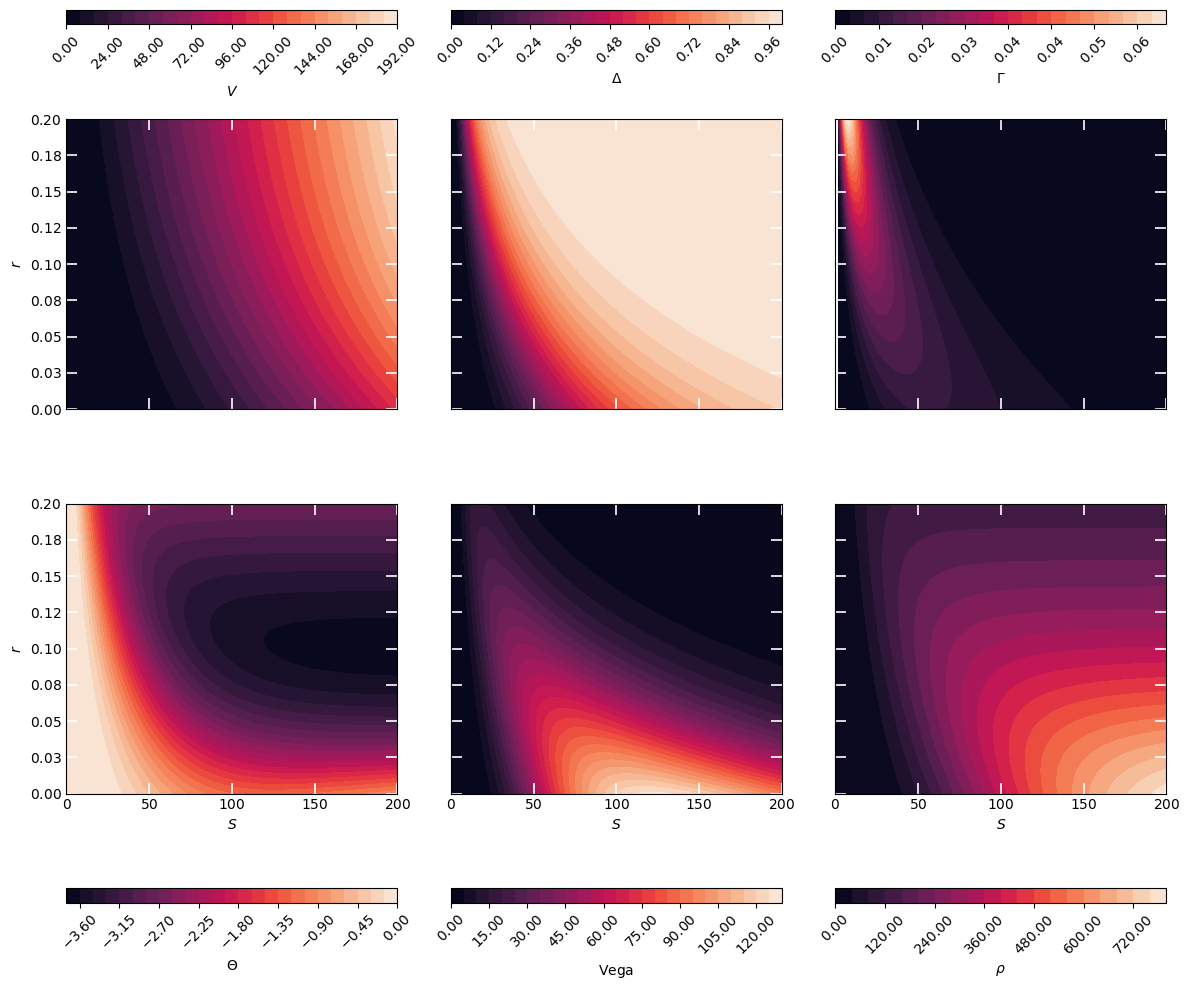

In [6]:
# See dependence on rate 

D = 0 
sigma = 0.2 

N = 100

t = 0
r = np.linspace(0,0.2,N)

# Choose a palette, e.g., 'deep'
palette_name = "rocket"

# Get N colors from the palette
colors = sns.color_palette(palette_name,  as_cmap=True)

ss,rr = np.meshgrid(s,r)

val = np.zeros(ss.shape)
Delta = np.zeros(ss.shape)
Gamma = np.zeros(ss.shape)
Theta = np.zeros(ss.shape)
Vega = np.zeros(ss.shape)
Rho = np.zeros(ss.shape)


fig = plt.figure(figsize=[12,10])
gs = gridspec.GridSpec(4, 3, figure=fig, height_ratios=[0.05,1,1,0.05])

for i,R in enumerate(r):
    val[i,:] = EuropeanCallValue(t,s,T,E,sigma,R,D)
    Delta[i,:] = EuropeanCallDelta(t,s,T,E,sigma,R,D)
    Gamma[i,:] = EuropeanCallGamma(t,s,T,E,sigma,R,D)
    Theta[i,:] = EuropeanCallTheta(t,s,T,E,sigma,R,D)
    Vega[i,:] = EuropeanCallVega(t,s,T,E,sigma,R,D)
    Rho[i,:] = EuropeanCallRho(t,s,T,E,sigma,R,D)

plotvars  = [val,Delta,Gamma,Theta,Vega,Rho]
varlabels = [r"$V$", r"$\Delta$", r"$\Gamma$", r"$\Theta$", r"$\text{Vega}$", r"$\rho$"]


cbar_idxs = [0,1,2,-3,-2,-1]
axes_idxs = [3,4,5,6,7,8]

axes = []
# Loop over the number of plots you want (6 in this case)
for i in range(6):
    ax = fig.add_subplot(gs[axes_idxs[i]])  # Plot axis
    axes.append(ax)
    
    cax = fig.add_subplot(gs[cbar_idxs[i]])  # Colorbar axis
    
    # Plotting the data (replace this with your actual plotting function)
    im = ax.contourf(ss,rr,plotvars[i], cmap=colors, levels=25)
    
    # Adding the colorbar
    cbar = fig.colorbar(im, cax=cax, label=varlabels[i], orientation="horizontal")
    cbar.ax.tick_params(labelrotation=45)
    
    ax.tick_params(which="both", direction="in", width=1.2, length=8, color="white", right=True, top=True)
    
    cbar.ax.xaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.2f'+r"$"))

# Set all axes to share the same x and y axis limits
for ax in axes:
    ax.sharex(axes[0])
    ax.sharey(axes[0])
     # Setting tick formatter for axes
    ax.xaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.0f'+r"$"))
    ax.yaxis.set_major_formatter(FormatStrFormatter(r"$"+'%.2f'+r"$"))

    
for i in range(3):
    axes[i].tick_params(labelbottom=False)
for i in [1,2,4,5]:
    axes[i].tick_params(labelleft=False)
for i in [0,3]:
    axes[i].set_ylabel(r"$r$")
for i in [3,4,5]:
    axes[i].set_xlabel(r"$S$")
# Adjust spacing between plots
#plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()

plt.show()